In [1]:
from data import *
import tensorflow as tf
from models import Eff
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2022-06-15 13:46:24.175758: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:

# !ls train_weights_combined_dataset3/efficientnetB0/

In [5]:
# !ls 

In [3]:
model = Eff('densenet121')
latest=tf.train.latest_checkpoint( 'train_weights_combined_dataset_densenet2/densenet121')
model.load_weights(latest)

2022-06-15 13:47:46.314699: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-15 13:47:46.316035: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-06-15 13:47:48.603346: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 13:47:48.604031: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-06-15 13:47:48.604058: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-06-15 13:47:48.606512: I tensorflow/stream_executor/platform/default/dso_lo

In [4]:
test_data = TestGenerator().batch(16)

In [5]:
pred_classes=[]
true_classes=[]
for img,classes in test_data:
    pred_classes.append(model(img))
    true_classes.append(classes)

2022-06-15 13:48:26.639074: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-15 13:48:26.639674: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299995000 Hz
2022-06-15 13:48:26.768352: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-06-15 13:48:27.257331: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-06-15 13:48:27.291495: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-06-15 13:48:27.528900: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


In [6]:
preds=tf.concat(pred_classes,axis=0).numpy()
preds=(preds>0.7).astype('int')

In [7]:
preds

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [8]:
trues=tf.concat(true_classes,axis=0).numpy().astype('int')

In [9]:
trues

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 0],
       ...,
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

[[[119  18]
  [ 24 121]]

 [[244   7]
  [ 17  14]]

 [[156  21]
  [ 41  64]]

 [[228   0]
  [ 26  28]]]


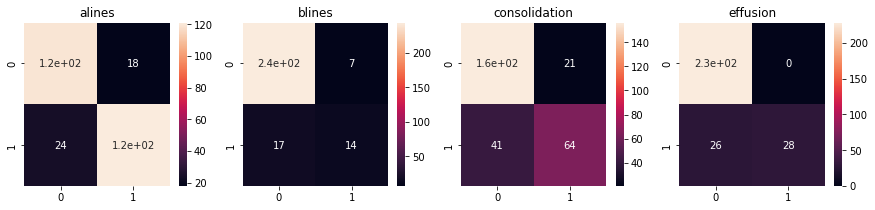

In [10]:
cm=multilabel_confusion_matrix(trues, preds)
print(np.array(cm))
classes=['alines','blines','consolidation','effusion']
fig,axes = plt.subplots(1,4,figsize=(15,3))

a=0
for i in range(4):
    sns.heatmap(ax=axes[i],data=cm[a],annot=True)
    axes[i].set_title(classes[a])
    a+=1

plt.show()

In [11]:
np.array(cm)

array([[[119,  18],
        [ 24, 121]],

       [[244,   7],
        [ 17,  14]],

       [[156,  21],
        [ 41,  64]],

       [[228,   0],
        [ 26,  28]]])

In [ ]:
[[[122 , 37],
  [  2 ,150]],

 [[264  ,14],
  [  8  ,25]],

 [[172  ,15],
  [ 36  ,88]],

 [[252   ,4],
  [  3  ,52]]]

[[[126,  33],
  [  3 ,149]],

 [[266  ,12],
  [  8  ,25]],

 [[174  ,13],
  [ 42 , 82]],

 [[252  , 4],
  [  5 , 50]]]

In [16]:
equate=preds==trues
def find_(row):
    return row[0]&row[1]&row[2]&row[3]
returned=np.apply_along_axis(find_,1,equate)
true_pred=np.where(returned==True)
false_pred=np.where(returned==False)

In [17]:
test_df = pd.read_csv('inputs/cleaned_testset.csv')

In [146]:
test_df=test_df.drop([0,24,92,227,157,143,32,203,179,98,13,23,142,36,154,273,62,10,12]).reset_index()

In [60]:
test_df2 = pd.read_csv('inputs/testset.csv')

In [62]:
# test_df2.image=test_df2.image.apply(lambda x: 'dataset/denoised_data/'+x.replace(' ','_'))

In [143]:
# test_df2[test_df2.image.isin(test_df.image.values.tolist())].reset_index()

In [147]:
test_df

,index,Unnamed: 0,image,group_kfold,alines,blines,consolidation,effusion
0,1,1,dataset/denoised_data/image_2435363771836-10_1...,4,0.0,0.0,1.0,0.0
1,2,2,dataset/denoised_data/image_2435363771836-10_1...,4,0.0,0.0,1.0,0.0
2,3,3,dataset/denoised_data/RT_UPPER_POST_LONG-15_26...,4,0.0,0.0,1.0,0.0
3,4,4,dataset/denoised_data/RT_UPPER_POST_LONG-12_58...,4,0.0,1.0,1.0,0.0
4,5,5,dataset/denoised_data/RT_UPPER_POST_LONG-12_58...,4,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
287,306,306,dataset/denoised_data/LT_LAT_LOWER_TRANS-12_45...,4,0.0,0.0,0.0,1.0
288,307,307,dataset/denoised_data/LT_LAT_LOWER_TRANS-12_45...,4,0.0,0.0,1.0,1.0
289,308,308,dataset/denoised_data/LT_LAT_LOWER_TRANS-12_45...,4,0.0,0.0,1.0,1.0
290,309,309,dataset/denoised_data/LT_LAT_LOWER_TRANS-11_4_...,4,0.0,0.0,1.0,0.0


In [19]:
def display_results(indxs):
    choice_indx=np.random.choice(np.arange(len(indxs)),size=len(indxs),replace=False)
    selected_indxs = indxs[choice_indx]
    print(selected_indxs)
    fig,axes=plt.subplots(10,4,figsize=(15,50))
    classes=np.array(['alines','blines','consolidation','effusion'])
    a=0
    for i in range(10):
        for j in range(4):
            selected_indxs[a]
            k=cv2.imread(test_df.image.values.tolist()[selected_indxs[a]])
            k=cv2.cvtColor(k,cv2.COLOR_BGR2RGB)
#             k =preprocess_img(k)
            axes[i,j].imshow(k)

            true_class_indxs = np.where(trues[selected_indxs[a]]>0)[0]
            pred_class_indxs = np.where(preds[selected_indxs[a]]>0)[0]
            axes[i,j].set_title("Pred--{} \nTrue--{},\n{}".format(classes[pred_class_indxs],classes[true_class_indxs],selected_indxs[a]))
            a+=1
            
    plt.show()

[286  23 290   9  98  24 205  34 164   1 241  55   0 235 142 238 108 279
 110 273 264  16  43  50 261  97 168 210 236 180 141 113 139  74  72 130
 157 188 254  64 289 100   3  53 114 247  17  66  78 217   4 232 288  25
 287 173 179 263  95 172 170 109]


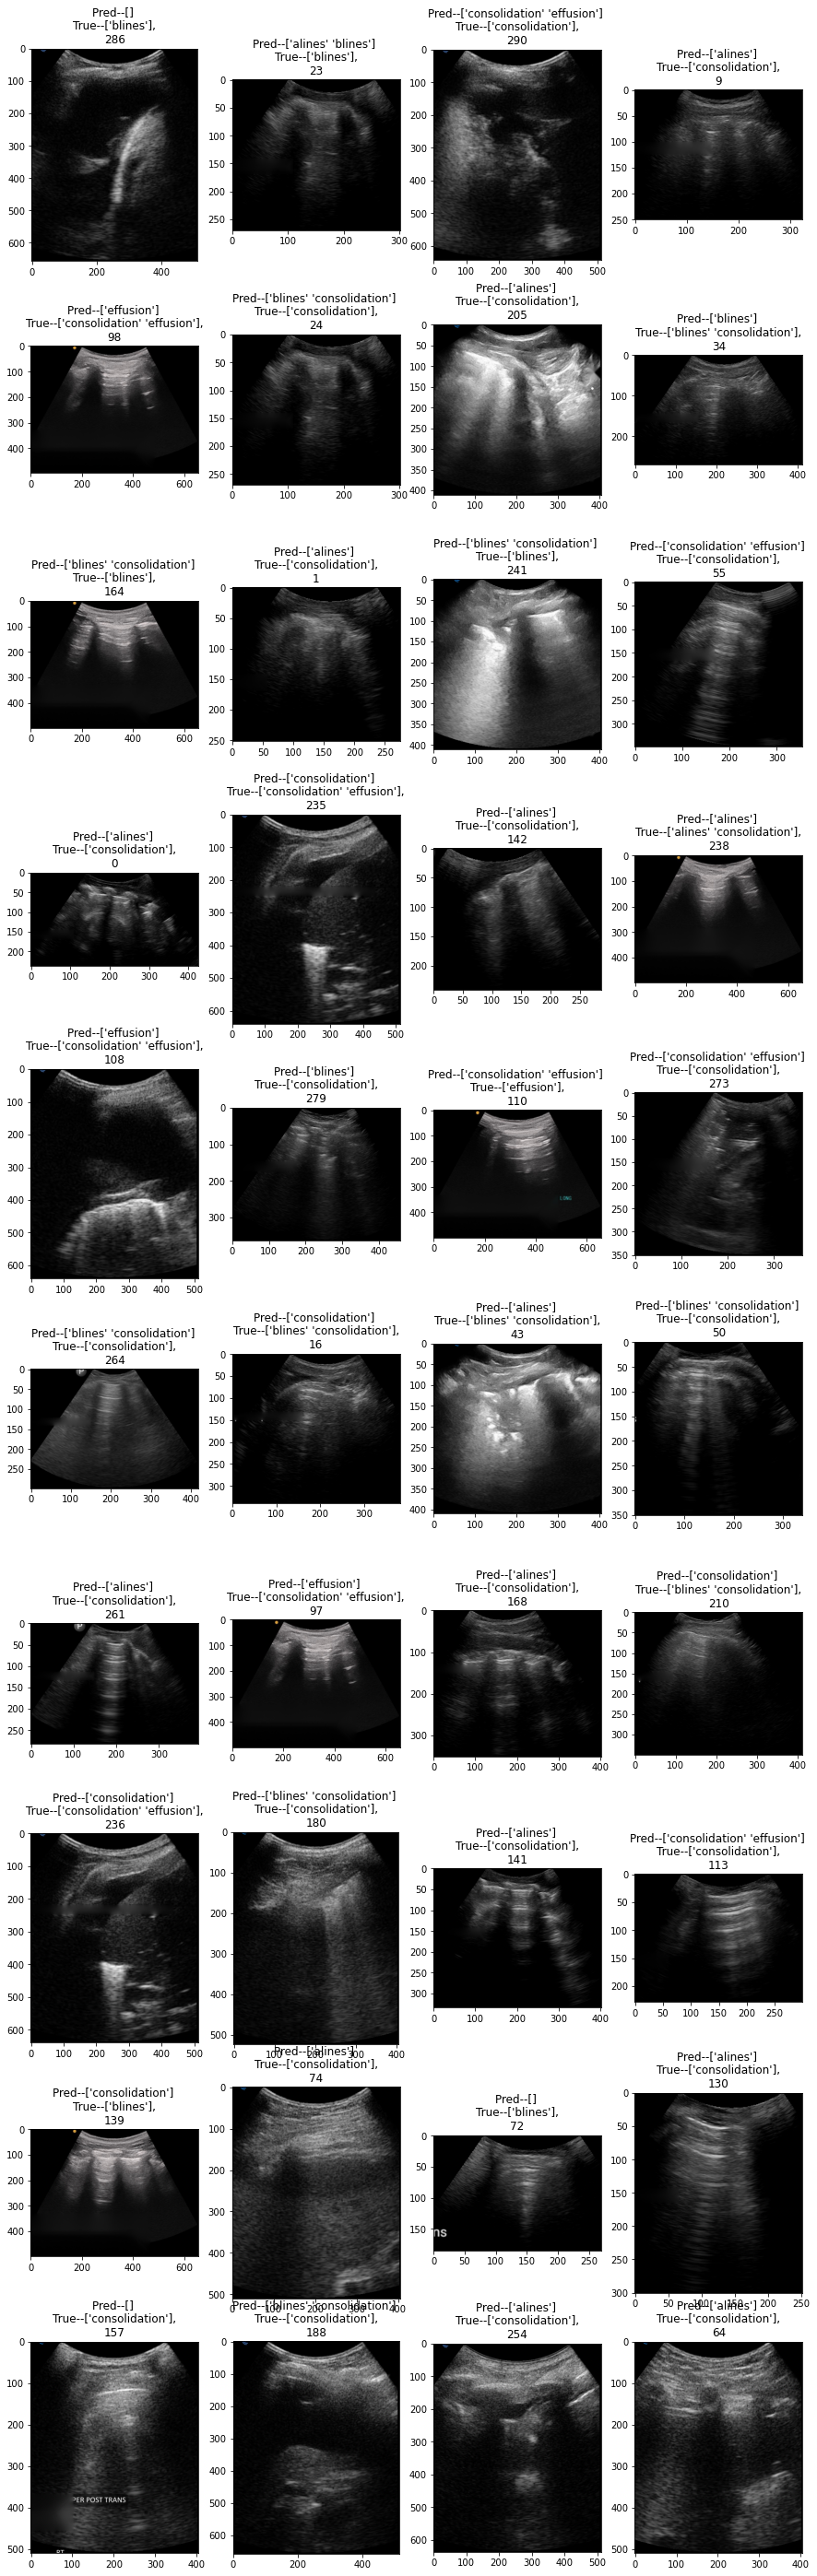

In [20]:
display_results(false_pred[0])

In [ ]:
286,9,205,1,0,142,279,43,168,141,74,72,157

In [54]:
open_=pd.read_csv('inputs/opensource_dataset.csv')

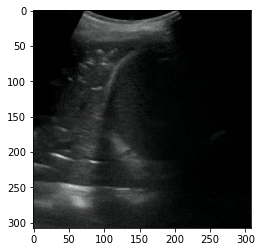

In [85]:
import matplotlib.pyplot as plt
image=cv2.imread(open_.image.values[312])
plt.imshow(image)

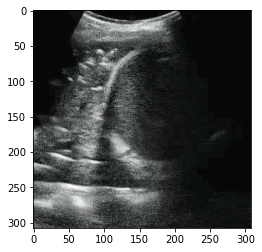

In [86]:
image=A.CLAHE(clip_limit=(1,4), p= 1)(image=image)
plt.imshow(image['image'])

In [98]:
len(open_.image.values[312].split('/'))>3

True

In [96]:
len(test_df.image.values[32].split('/'))>3

False

In [ ]:
[[[127 , 32]
  [  3, 149]]

 [[262 , 16]
  [  9 , 24]]

 [[148 , 39]
  [ 23 ,101]]

 [[251 ,  5]
  [  2 , 53]]]

**[[[122,  37]
  [  2 ,150]]

 [[263 , 15]
  [  8  ,25]]

 [[170 , 17]
  [ 35 , 89]]

 [[252  , 4]
  [  0  ,55]]]


**[[[125  ,34],
  [  3, 149]],

 [[269  , 9],
  [ 10  ,23]],

 [[168 , 19],
  [ 46 , 78]],

 [[255 ,  1],
  [  0 , 55]]]



[[[128 , 31]
  [  5 ,147]]

 [[263 , 15]
  [ 10 , 23]]

 [[149 , 38]
  [ 24 ,100]]

 [[251  , 5]
  [  2  ,53]]]


In [12]:
import numpy as np
sd=np.array([[[119,  18],
        [ 24, 121]],

       [[244,   7],
        [ 17,  14]],

       [[156,  21],
        [ 41,  64]],

       [[228,   0],
        [ 26,  28]]])

In [13]:
for mat in sd:
    print(np.diag(mat)/np.sum(mat,axis=1))

[0.86861314 0.83448276]
[0.97211155 0.4516129 ]
[0.88135593 0.60952381]
[1.         0.51851852]


In [14]:
sensitivity=[]
for mat in sd:
    sensitivity.append(np.array(mat[1][1])/np.sum(mat,axis=1)[1])
sum(sensitivity)/4

0.603534497472206

In [15]:
# sensitivity

In [16]:
specitivity=[]
for mat in sd:
    specitivity.append(mat[0][0]/np.sum(mat,axis=1)[0])
sum(specitivity)/4

0.9305201561685954

In [22]:
specitivity

[0.8050314465408805, 0.9460431654676259, 0.7967914438502673, 0.98046875]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('inputs/cleaned_trainset.csv')
test = pd.read_csv('inputs/cleaned_testset.csv')

In [18]:
c=pd.concat([train[['alines','blines','consolidation','effusion']],
test[['alines','blines','consolidation','effusion']]])

In [24]:
c.sum()

alines           969.0
blines           246.0
consolidation    544.0
effusion         194.0
dtype: float64

Text(0.5, 0, 'Artifacts')

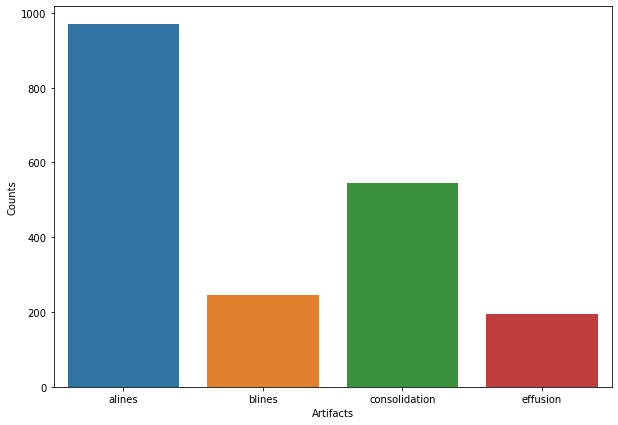

In [47]:
plt.rcParams["figure.figsize"] = (10,7)
sns.barplot(x=['alines','blines','consolidation','effusion'],y=[969,246,544,194])
plt.ylabel('Counts')
plt.xlabel('Artifacts')

In [61]:
file=pd.read_excel('inputs/data.xlsx')

In [62]:
file

,start,end,Radiologist,Patient Number,Age,Gender,Is the patient pregnant,Date-Time,District,Does the patient have any symptoms,...,_version__002,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,_tags,_index
0,2022-02-06 22:35:04.168,2022-02-06 23:24:54.522,Eva Nabawanuka,COAST-055,33,Male,NaN,2022-02-03 14:38:00,Kampala,Had covid four weeks ago,...,NaN,4,8fb1fd8b-4e2a-4b3f-bfbe-778c5bf77c57,2022-02-07 17:01:04,NaN,NaN,submitted_via_web,dr_eva,NaN,1
1,2022-02-04 02:45:36.722,2022-02-07 09:13:18.138,Eva Nabawanuka,COAST/052,29,Male,NaN,2022-01-31 16:07:00,KAMPALA,"TESTED POSITIVE FOR COVID 2 WEEKS AGO, STILL H...",...,NaN,5,7c126ed7-5cc4-45a7-80a2-f550fb63ae48,2022-02-07 17:13:32,NaN,NaN,submitted_via_web,dr_eva,NaN,2
2,2022-02-08 22:30:51.603,2022-02-08 22:44:15.606,Samuel Bugeza,COAST-053,20,Male,NaN,2022-02-03 14:11:00,Kampala,Chest Pain following a boda boda accident,...,NaN,6,cd31abc1-2339-4823-8d76-d38203258f7a,2022-02-08 19:44:32,NaN,NaN,submitted_via_web,dr_eva,NaN,3
3,2022-02-08 22:44:17.379,2022-02-08 23:18:26.057,Eva Nabawanuka,COAST-056,40,Male,NaN,2022-02-04 11:34:00,Kampala,Known ISS off HAART with cough and fever,...,NaN,7,7f39c048-c06c-481d-b662-dd17c74b770f,2022-02-08 20:18:43,NaN,NaN,submitted_via_web,dr_eva,NaN,4
4,2022-02-07 09:13:18.409,2022-02-07 10:13:14.279,Eva Nabawanuka,COAST-055,33,Male,NaN,2022-02-03 14:31:00,KAMPALA,"TESTED POSITIVE FOR COVID 4 WEEKS AGO, HAS CHE...",...,NaN,8,8f2262d9-38ee-4700-a59b-af02d1ad7f10,2022-02-10 05:20:43,NaN,NaN,submitted_via_web,dr_juliana,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-03 16:19:55.160,2022-05-04 15:52:41.329,Maxwell Okujja,COAST 119,52,Male,NaN,2022-03-28 12:00:00,Kampala,"Cough, hiccups, Difficulty in breathing",...,vMB4CP5xK2uzixhNP4JYPG,108,15315618-83cb-44cc-9e83-ab16c4f743f3,2022-05-04 12:52:59,NaN,NaN,submitted_via_web,dr_eva,NaN,101
101,2022-05-04 15:52:43.616,2022-05-04 16:05:19.697,Eva Nabawanuka,COAST 120,79,Male,NaN,2022-03-28 13:00:00,Kampala,"Cough, difficulty in breathing and cough",...,vMB4CP5xK2uzixhNP4JYPG,109,947379aa-b480-40b5-9f07-803e3afda454,2022-05-04 13:05:37,NaN,NaN,submitted_via_web,dr_eva,NaN,102
102,2022-05-04 16:05:23.407,2022-05-04 16:18:10.747,Eva Nabawanuka,COAST 121,37,Male,NaN,2022-03-28 10:45:00,Bushenyi,Cough and night sweats,...,vMB4CP5xK2uzixhNP4JYPG,110,bd1794e1-4b9e-469d-896e-1c9ed1c89a6d,2022-05-04 13:18:28,NaN,NaN,submitted_via_web,dr_eva,NaN,103
103,2022-05-04 16:18:14.222,2022-05-04 16:32:09.631,Maxwell Okujja,COAST 122,43,Female,No,2022-03-29 11:30:00,Wakiso,"Cough, chest pain, night sweats",...,vMB4CP5xK2uzixhNP4JYPG,111,bed093dd-f758-4359-8829-cf6c6cecc35e,2022-05-04 13:32:26,NaN,NaN,submitted_via_web,dr_eva,NaN,104
